In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df=pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300.0,0.0,0,no
1,yes,adult,534817.0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0,no
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0.0,0.0,0,yes
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0,yes
4,no,adult,530255.0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300.0,0.0,0,no


<Axes: >

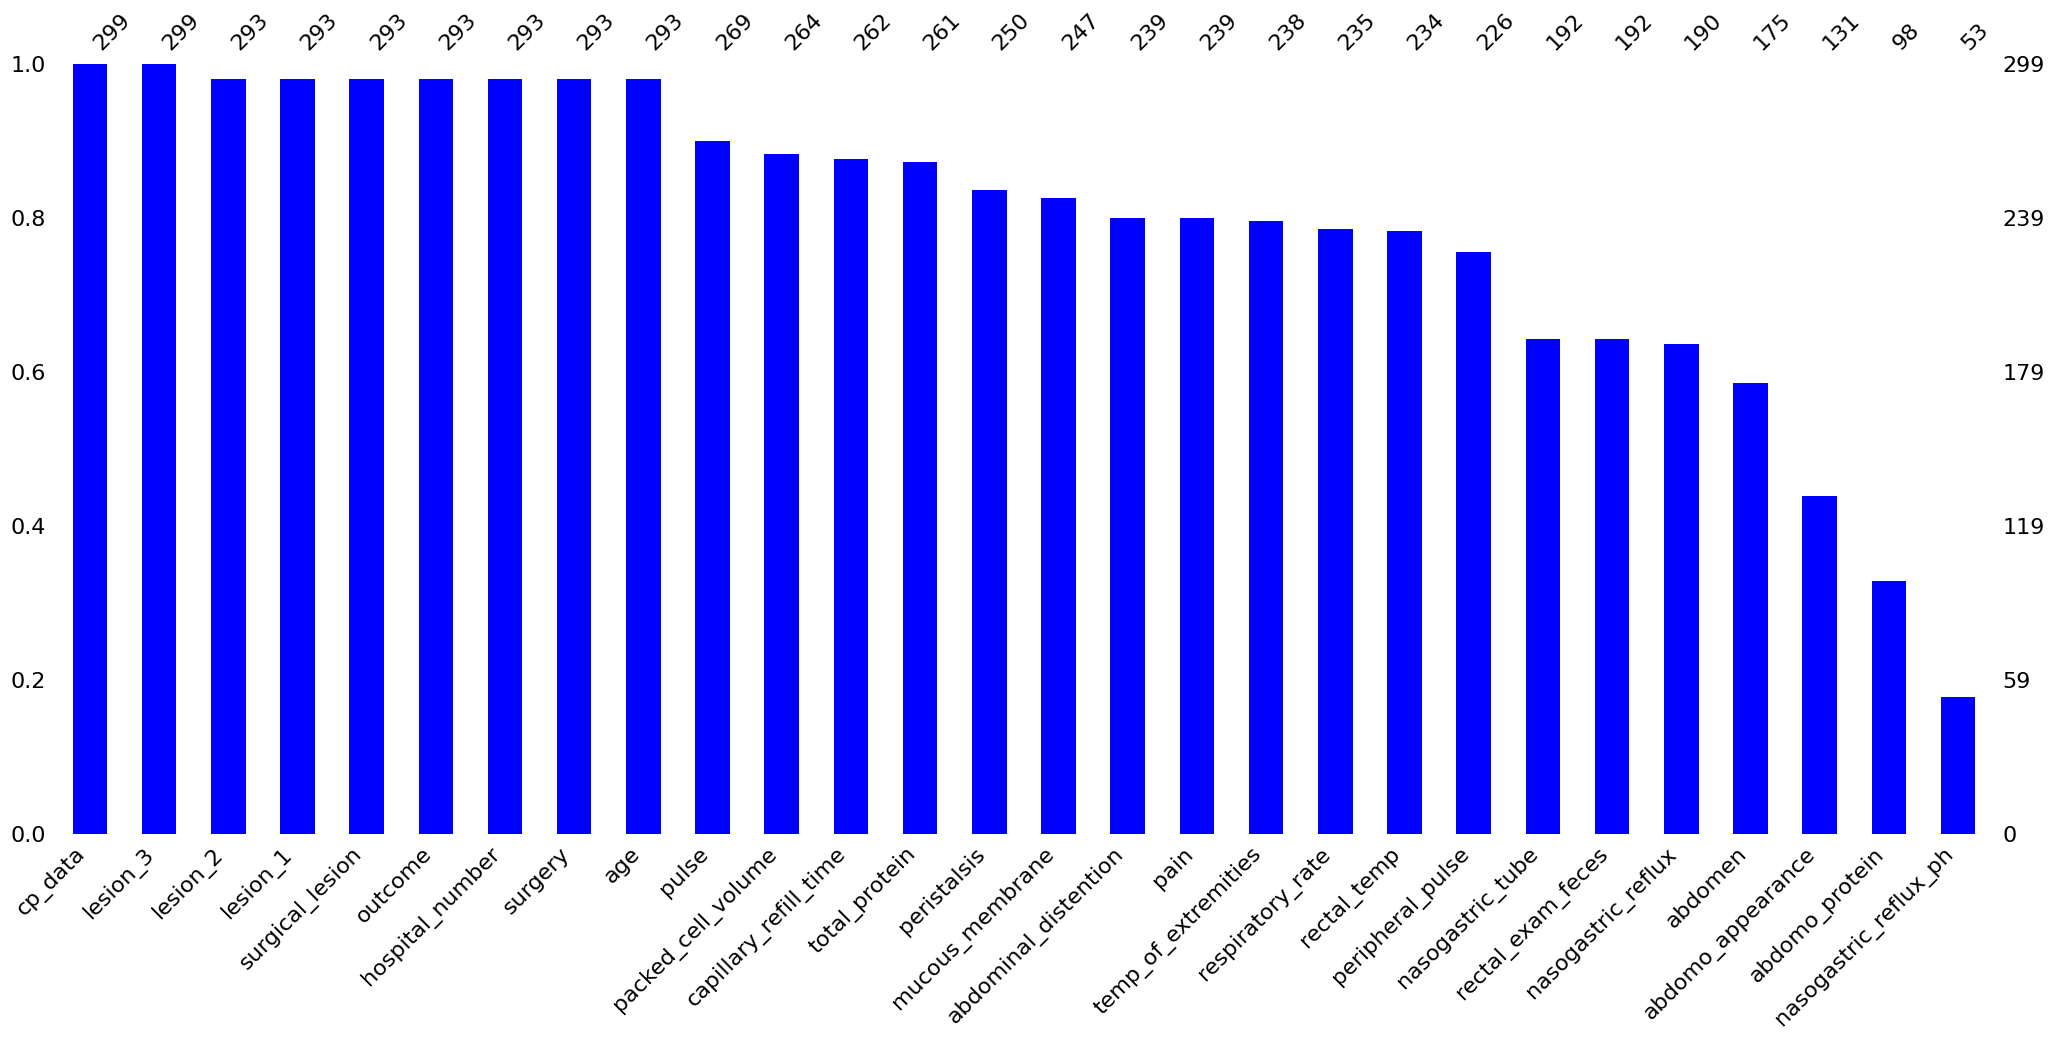

In [3]:
##Excersice
##Carefully explore through this data and deal with the missing values
import missingno as mns
mns.bar(df, sort='descending', color = 'blue')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                293 non-null    object 
 1   age                    293 non-null    object 
 2   hospital_number        293 non-null    float64
 3   rectal_temp            234 non-null    float64
 4   pulse                  269 non-null    float64
 5   respiratory_rate       235 non-null    float64
 6   temp_of_extremities    238 non-null    object 
 7   peripheral_pulse       226 non-null    object 
 8   mucous_membrane        247 non-null    object 
 9   capillary_refill_time  262 non-null    object 
 10  pain                   239 non-null    object 
 11  peristalsis            250 non-null    object 
 12  abdominal_distention   239 non-null    object 
 13  nasogastric_tube       192 non-null    object 
 14  nasogastric_reflux     190 non-null    object 
 15  nasoga

<Axes: >

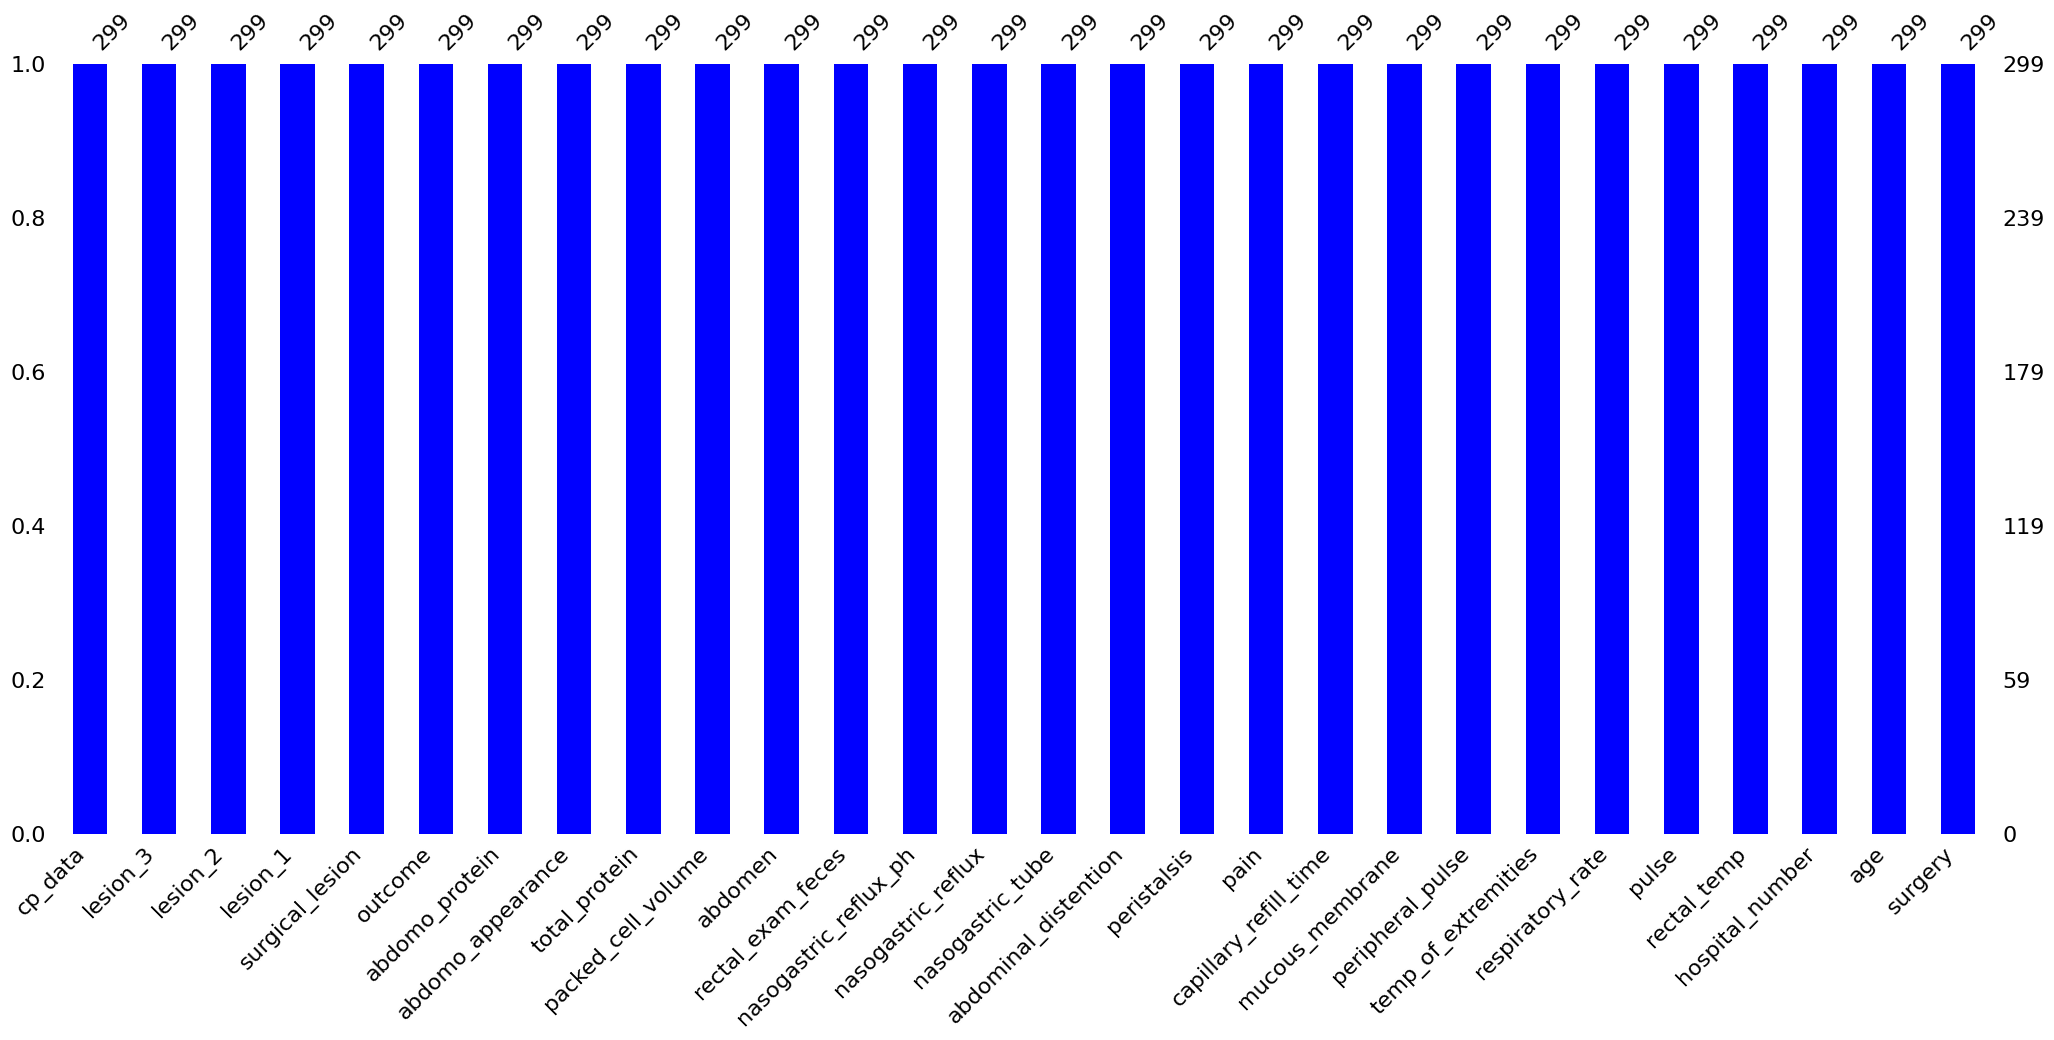

In [5]:
import warnings
warnings.filterwarnings("ignore")
category = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int', 'float'])
for x in category:
    df[x].fillna(df[x].mode()[0], inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(), inplace=True)
import missingno as mns
mns.bar(df, sort='descending', color = 'blue')    


In [6]:
df.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [7]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [8]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [9]:
df['outcome'].value_counts()

outcome
lived         182
died           76
euthanized     41
Name: count, dtype: int64

In [11]:

from sklearn.utils import resample
df_lived=df[df['outcome']=='lived']
df_died=df[df['outcome']=='died']
df_euthanized=df[df['outcome']=='euthanized']
df_died_sam=resample(df_died, n_samples=182)
df_euthanized_sam=resample(df_euthanized, n_samples=182)
df = pd.concat([df_lived,df_died_sam, df_euthanized_sam])
df = df.sample(frac=1)
df['outcome'].value_counts()

outcome
lived         182
euthanized    182
died          182
Name: count, dtype: int64

In [12]:
category=df.select_dtypes(include=['object','category'])
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
235,0,0,528179.0,38.2,42.0,26.000000,2,2,3,1,...,36.0,6.9,1,3.054082,2,0,3111.0,0.0,0,0
163,1,0,528523.0,38.7,76.0,30.455319,2,2,1,2,...,50.0,8.0,1,3.054082,2,1,2208.0,0.0,0,1
69,0,0,530276.0,38.0,48.0,12.000000,2,2,3,1,...,42.0,6.3,1,4.100000,2,0,3111.0,0.0,0,1
1,1,0,534817.0,39.2,88.0,20.000000,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208.0,0.0,0,0
71,1,0,529424.0,37.8,48.0,28.000000,2,2,3,1,...,46.0,5.9,1,7.000000,2,0,0.0,0.0,0,1


In [15]:
##CHECKING THE IMPORTANCE OF A COLUMN
x = df.drop(['outcome','hospital_number'],axis=1)
y= df['outcome']
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y, random_state = 42)
feature_importance = pd.DataFrame({'Feature':x.columns, 'Importance':mutual_info})
feature_importance.sort_values('Importance')
fig = px.bar(feature_importance,x = 'Feature', y = 'Importance',color='Feature')
fig.update_layout(height =700,width = 1000)
fig.show()


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
pred1 = model1.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        47
           1       0.54      0.50      0.52        26
           2       0.64      0.38      0.47        37

    accuracy                           0.64       110
   macro avg       0.62      0.60      0.59       110
weighted avg       0.63      0.64      0.61       110



In [19]:
model1_tuning = LogisticRegression()
param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1,1,10,100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100,200,500],
    'multi_class': ['auto', 'ovr', 'multinomial']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model1_tuning,param_grid=param_grid, cv=5, verbose=1, n_jobs=1)
grid_search.fit(xtrain,ytrain)
best_param = grid_search.best_params_
best_model1 = grid_search.best_estimator_
print(best_param)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'C': 10, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cholesky'}


In [23]:
tuningpred1 = best_model1.predict(xtest)
print(classification_report(ytest,tuningpred1))
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.62      0.92      0.74        26
           2       0.92      0.65      0.76        37

    accuracy                           0.81       110
   macro avg       0.82      0.81      0.80       110
weighted avg       0.85      0.81      0.81       110



DecisionTreeClassifier()

In [24]:
pred2 = model2.predict(xtest)
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.90      1.00      0.95        26
           2       0.93      0.70      0.80        37

    accuracy                           0.88       110
   macro avg       0.89      0.89      0.88       110
weighted avg       0.89      0.88      0.88       110

